# [CDAF] Atividade 1

## Nome e matrícula
Nome: Bernardo Dutra Lemos
Matrícula: 2022043949

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão a partir dos dados de
súmula.


Para isso utilizaremos o dataset "Soccer Prediction Challenge", disponível no Moodle.

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie 4 histogramas: 
    a) um para a quantidade de gols marcados por jogo pelos times mandantes
    b) um para a quantidade de gols marcados por jogo pelos time visitantes
    c) um para a quantidade total de gols em cada partida
    d) um para a diferença de gols por partida
- Caso hajam jogos com erros claros de anotação, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média dos valores representados em cada um dos 4 histogramas.

In [2]:
df = pd.read_excel('TrainingSet_2023_02_08.xlsx')
df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L
...,...,...,...,...,...,...,...,...,...
299209,22-23,ZAF1,18/02/2023,Kaizer Chiefs,Golden Arrows,-1,-1,0,D
299210,22-23,ZAF1,18/02/2023,Sekhukhune United,Richards Bay FC,-1,-1,0,D
299211,22-23,ZAF1,18/02/2023,AmaZulu,Tim Sukazi Galaxy,-1,-1,0,D
299212,22-23,ZAF1,19/02/2023,Bloemfontein Celtic,SuperSport United,-1,-1,0,D


In [4]:
df = df[(df['HS'] >= 0) | (df['AS'] >= 0)] # Filtrando linhas com resultados inconsistentes
df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L
...,...,...,...,...,...,...,...,...,...
299203,22-23,ZAF1,04/02/2023,Golden Arrows,Bloemfontein Celtic,1,2,-1,L
299204,22-23,ZAF1,04/02/2023,Orlando Pirates,Mamelodi Sundowns,0,1,-1,L
299205,22-23,ZAF1,04/02/2023,SuperSport United,Cape Town City FC,2,0,2,W
299206,22-23,ZAF1,04/02/2023,Tshakhuma Tsha Madzivhandila,Sekhukhune United,2,0,2,W


In [5]:
def plot_hist(df,density=False):    
    fig,ax = plt.subplots(1,4,figsize=(15,3))

    for i in range(3):
        ax[i].grid(True)  # Adiciona a grade
        ax[i].set_xticks(np.arange(0, 11, 1))  # Define os y_ticks
        #ax[i].set_xlim(0, 10)  # Define o limite do eixo y
        #ax[i].set_yscale('log')  # Define a escala do eixo y como logarítmica

    bins = np.arange(-0.5, 10.5, 1)
    ax[0].hist(df['HS'], bins=bins, density=density)
    ax[0].set_title('Gols mandantes')


    ax[1].hist(df['AS'], bins=bins, density=density)
    ax[1].set_title('Gols visitantes')

    ax[2].hist(df['AS']+df['HS'], bins=bins, density=density)
    ax[2].set_title('Soma dos gols')


    ax[3].hist(df['GD'], bins=np.arange(-10.5, 11.5, 1),density=density)
    ax[3].set_title('Gols de diferença(Mandante - Visitante)')
    ax[3].set_xticks(np.arange(-10, 12, 1))  # Define os y_ticks
    ax[3].set_xlim(-10, 10)  # Define o limite do eixo y
    ax[3].set_yscale('log')  # Define a escala do eixo y como logarítmica
    ax[3].grid(True)  # Adiciona a grade

    plt.tight_layout()
    plt.show()

def statistics(df):
    hist_data = {
    'Gols mandantes': [df['HS'].max(), df['HS'].min(), df['HS'].mean()],
    'Gols visitantes': [df['AS'].max(), df['AS'].min(), df['AS'].mean()],
    'Soma dos gols': [(df['AS']+df['HS']).max(), (df['AS']+df['HS']).min(), (df['AS']+df['HS']).mean()],
    'Gols de diferença(Mandante - Visitante)': [df['GD'].max(), df['GD'].min(), df['GD'].mean()]
    }

    df_hist = pd.DataFrame(hist_data, index=['Max', 'Min', 'Mean']).T
    return df_hist


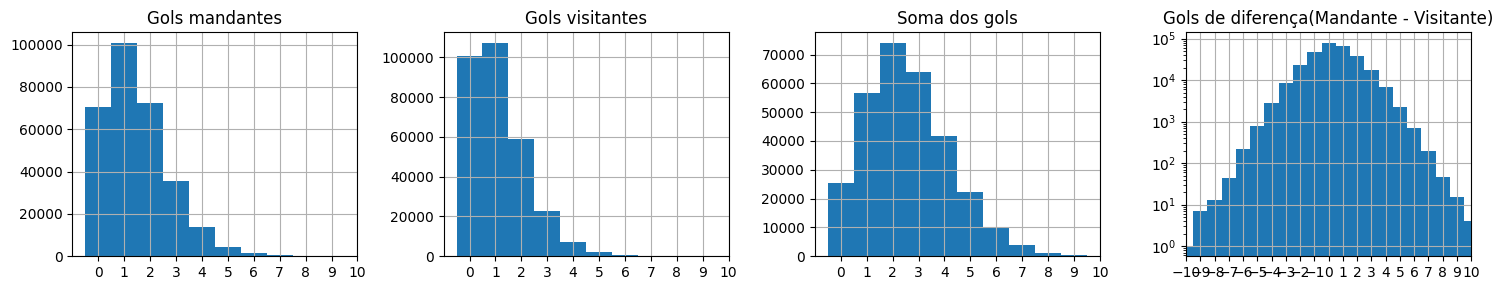

In [6]:
plot_hist(df)

In [7]:
statistics(df)

,Max,Min,Mean
Gols mandantes,13.0,0.0,1.471700
Gols visitantes,13.0,0.0,1.121441
Soma dos gols,15.0,0.0,2.593141
Gols de diferença(Mandante - Visitante),12.0,-13.0,0.350259


## Questão 2
- Escolha uma temporada já finalizada de alguma das ligas presentes no dataset.
- Repita os 4 histogramas da questão 1 utilizando apenas dados do campeonato selecionado.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?

In [7]:
brasil_df = df[df['Lge'] == 'BRA1'].copy()
brasil_df['Date'] = pd.to_datetime(brasil_df['Date'], format='%d/%m/%Y')
brasil_df = brasil_df.loc[(brasil_df['Date'] >= '2021-05-29') & (brasil_df['Date'] <= '2021-12-10')]
brasil_df

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
242300,21-22,BRA1,2021-05-29,Cuiaba Esporte Clube,Esporte Clube Juventude,2,2,0,D
242301,21-22,BRA1,2021-05-30,Esporte Clube Bahia,Santos FC,3,0,3,W
242302,21-22,BRA1,2021-05-30,Sao Paulo FC,Fluminense Rio de Janeiro,0,0,0,D
242303,21-22,BRA1,2021-05-30,Atletico Mineiro,Fortaleza,1,2,-1,L
242304,21-22,BRA1,2021-05-30,Ceara SC,Gremio Porto Alegre,3,2,1,W
...,...,...,...,...,...,...,...,...,...
242675,21-22,BRA1,2021-12-10,Gremio Porto Alegre,Atletico Mineiro,4,3,1,W
242676,21-22,BRA1,2021-12-10,Esporte Clube Juventude,Corinthians Paulista,1,0,1,W
242677,21-22,BRA1,2021-12-10,Sociedade Esportiva Palmeiras,Ceara SC,1,0,1,W
242678,21-22,BRA1,2021-12-10,Santos FC,Cuiaba Esporte Clube,1,1,0,D


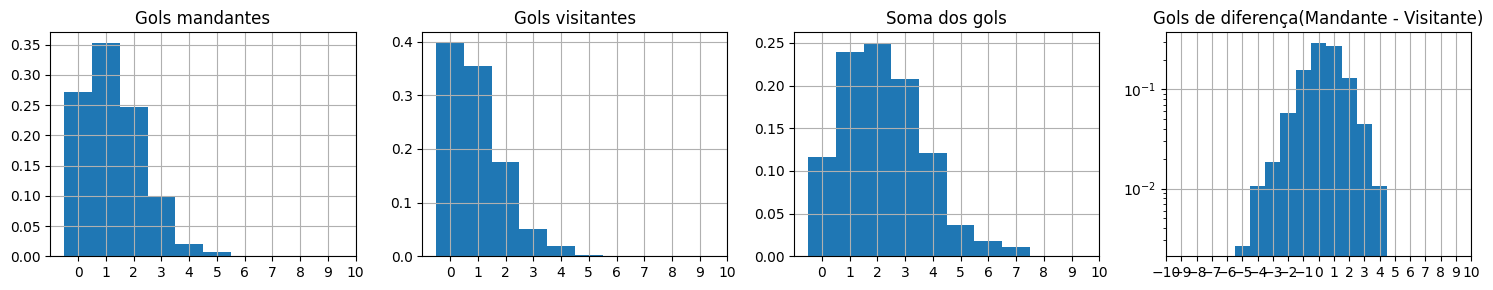

In [8]:
plot_hist(brasil_df,density=True)

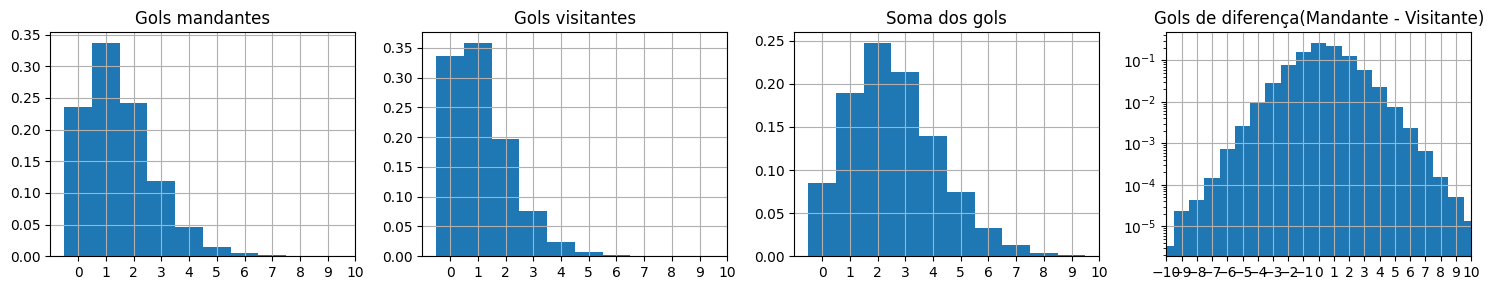

In [9]:
plot_hist(df,density=True)

In [10]:
statistics(brasil_df)

,Max,Min,Mean
Gols mandantes,5.0,0.0,1.271053
Gols visitantes,5.0,0.0,0.944737
Soma dos gols,7.0,0.0,2.215789
Gols de diferença(Mandante - Visitante),4.0,-5.0,0.326316


- Podemos perceber que no Brasil
os times mandantes tendem a tomar menos gols e tem uma tendêcia muito parecida, mas menor, em fazer gols.
- Além disso os jogos no Brasil tem uma tendência de ter menos gols.

## Questão 3
- Utilizando apenas dados do campeonato selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordene a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo considerando apenas a primeira metade de jogos.

In [11]:
def create_table(df):
    teams = df['HT'].unique()
    columns = ['Team', 'Points' ,'Matches', 'Wins', 'Draws', 'Losses', 'Goals', 'Conceded', 'GD']
    table = pd.DataFrame(columns=columns)
    for team in teams:
        df_br = df[(df['HT'] == team) | (df['AT'] == team)]
        matches = df_br.shape[0]

        wins = df_br[df_br['HT'] == team]['WDL'].apply(lambda x: 1 if x == 'W' else 0).sum()
        wins += df_br[df_br['AT'] == team]['WDL'].apply(lambda x: 1 if x == 'L' else 0).sum()

        draws = df_br[df_br['HT'] == team]['WDL'].apply(lambda x: 1 if x == 'D' else 0).sum()
        draws += df_br[df_br['AT'] == team]['WDL'].apply(lambda x: 1 if x == 'D' else 0).sum()

        losses = df_br[df_br['HT'] == team]['WDL'].apply(lambda x: 1 if x == 'L' else 0).sum()
        losses += df_br[df_br['AT'] == team]['WDL'].apply(lambda x: 1 if x == 'W' else 0).sum()

        goals = df_br[df_br['HT'] == team]['HS'].sum()
        goals += df_br[df_br['AT'] == team]['AS'].sum()

        conceded = df_br[df_br['HT'] == team]['AS'].sum()
        conceded += df_br[df_br['AT'] == team]['HS'].sum()

        gd = goals - conceded

        points = wins*3 + draws

        table = pd.concat([table, pd.DataFrame([[team, points, matches, wins, draws, losses, goals, conceded, gd]], columns=columns)], ignore_index=True)

    table = table.sort_values(by=['Points', 'Wins', 'GD', 'Goals'], ascending=[False,False,False,False]).reset_index(drop=True)
    return table

In [12]:
brasil2021 = create_table(brasil_df)
brasil2021

,Team,Points,Matches,Wins,Draws,Losses,Goals,Conceded,GD
0,Atletico Mineiro,84,38,26,6,6,67,34,33
1,Flamengo Rio de Janeiro,71,38,21,8,9,69,36,33
2,Sociedade Esportiva Palmeiras,66,38,20,6,12,58,43,15
3,Fortaleza,58,38,17,7,14,44,45,-1
4,Corinthians Paulista,57,38,15,12,11,40,36,4
5,Bragantino,56,38,14,14,10,55,46,9
6,Fluminense Rio de Janeiro,54,38,15,9,14,38,38,0
7,America MG,53,38,13,14,11,41,37,4
8,Atletico Clube Goianiense,53,38,13,14,11,33,36,-3
9,Santos FC,50,38,12,14,12,35,40,-5


In [13]:
#firt turn
brasil_df1 = brasil_df.iloc[:int(brasil_df.shape[0]/2)]
table1 = create_table(brasil_df1)
table1

,Team,Points,Matches,Wins,Draws,Losses,Goals,Conceded,GD
0,Atletico Mineiro,42,19,13,3,3,29,13,16
1,Sociedade Esportiva Palmeiras,35,19,11,2,6,30,23,7
2,Flamengo Rio de Janeiro,34,17,11,1,5,35,17,18
3,Fortaleza,33,20,9,6,5,29,22,7
4,Bragantino,32,19,8,8,3,30,21,9
5,Corinthians Paulista,28,19,7,7,5,18,16,2
6,Cuiaba Esporte Clube,27,20,6,9,5,21,20,1
7,Fluminense Rio de Janeiro,25,19,6,7,6,18,20,-2
8,Atletico Clube Goianiense,25,18,6,7,5,15,17,-2
9,Atletico Paranaense,24,19,7,3,9,23,23,0


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

In [14]:
df_poisson = brasil_df[['HT', 'AT', 'HS', 'AS']].copy()
df_poisson = df_poisson.rename(columns={'HT': 'HomeTeam', 'AT': 'AwayTeam', 'HS': 'HomeGoals', 'AS': 'AwayGoals'})
df_poisson

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
242300,Cuiaba Esporte Clube,Esporte Clube Juventude,2,2
242301,Esporte Clube Bahia,Santos FC,3,0
242302,Sao Paulo FC,Fluminense Rio de Janeiro,0,0
242303,Atletico Mineiro,Fortaleza,1,2
242304,Ceara SC,Gremio Porto Alegre,3,2
...,...,...,...,...
242675,Gremio Porto Alegre,Atletico Mineiro,4,3
242676,Esporte Clube Juventude,Corinthians Paulista,1,0
242677,Sociedade Esportiva Palmeiras,Ceara SC,1,0
242678,Santos FC,Cuiaba Esporte Clube,1,1


In [15]:
goal_model_data = pd.concat([df_poisson[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           df_poisson[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -984.52
Date:                Tue, 02 Apr 2024   Deviance:                       776.78
Time:                        19:53:45   Pearson chi2:                     656.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1273
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.2203      0.233     -0.945      0.345      -0.677       0.237
team[T.Atletico Clube Goianiense]            -0.2187      0.234     -0.934      0.350      -0.678       0.240
team[T.Atletico Mineiro]                      0.4888      0.199      2.462      0.014       0.100       0.878
team[T.Atletico Paranaense]                   0.0100      0.221      0.045      0.964      -0.423       0.443
team[T.Bragantino]                            0.3061      0.207      1.481      0.139      -0.099       0.711
team[T.Ceara SC]                             -0.0489      0.224     -0.218      0.827      -0.488       0.390
team[T.Chapecoense]                          -0.3812      0.248     -1.536      0.125      -0.868       0.105
team[T.Corinthians Paulista]                 -0.0260      0.222     -0.117      0.907      -0.462       0.410
team[T.Cuiaba Esporte Clube]                 -0.1876      0.232     -0.808      0.419      -0.643       0.267
team[T.Esporte Clube Bahia]                   0.0418      0.220      0.190      0.849      -0.389       0.473
team[T.Esporte Clube Juventude]              -0.1217      0.229     -0.532      0.595      -0.570       0.327
team[T.Flamengo Rio de Janeiro]               0.5209      0.197      2.638      0.008       0.134       0.908
team[T.Fluminense Rio de Janeiro]            -0.0749      0.225     -0.332      0.740      -0.517       0.367
team[T.Fortaleza]                             0.0808      0.217      0.372      0.710      -0.345       0.507
team[T.Gremio Porto Alegre]                   0.0884      0.217      0.407      0.684      -0.338       0.515
team[T.Internacional]                         0.0771      0.217      0.355      0.723      -0.349       0.503
team[T.Santos FC]                            -0.1549      0.230     -0.672      0.501      -0.606       0.297
team[T.Sao Paulo FC]                         -0.2777      0.238     -1.166      0.244      -0.745       0.189
team[T.Sociedade Esportiva Palmeiras]         0.3555      0.204      1.740      0.082      -0.045       0.756
team[T.Sport Club Recife]                    -0.5365      0.257     -2.086      0.037      -1.041      -0.032
opponent[T.Atletico Clube Goianiense]        -0.0373      0.234     -0.159      0.873      -0.497       0.422
opponent[T.Atletico Mineiro]                 -0.0520      0.238     -0.218      0.827      -0.518       0.414
opponent[T.Atletico Paranaense]               0.1963      0.222      0.883      0.377      -0.239       0.632
opponent[T.Bragantino]                        0.2361      0.221      1.067      0.286      -0.197       0.670
opponent[T.Ceara SC]                          0.0242      0.231      0.105      0.916      -0.429       0.477
opp

In [16]:
home_team='Atletico Mineiro'
away_team='Fortaleza'

home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate[1]))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate[1]))

home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Atletico Mineiro against Fortaleza expect to score: 2.1495675773592464
Fortaleza against Atletico Mineiro expect to score: 0.8258001436378025
Atletico Mineiro: 3
Fortaleza: 0


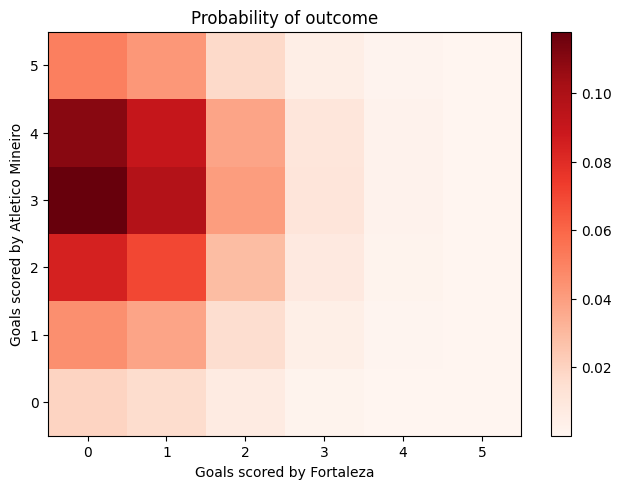

Home win:  0.6550885961380416
Draw:  0.1906790592904506
Away win:  0.1314328035690605


In [17]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[0])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[0])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))
print('Home win: ', homewin)
print('Draw: ', draw)
print('Away win: ', awaywin)

## Questão 5
- Utilize o modelo treinado para simular os placares de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 são empates.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar tiveram campanhas "sortudas" ou "azaradas"? 

In [18]:
def choose_position(prob_matrix):
  probs = prob_matrix.flatten()
  probs /= probs.sum()
  positions = np.arange(len(probs))
  choosen = np.random.choice(positions, p=probs)
  return np.unravel_index(choosen, prob_matrix.shape)

def Compare2Tables(table1, table2):
    table1['Posição Real'] = table1.index + 1
    table2['Posição Simulada'] = table2.index + 1
    table = pd.merge(table1, table2, left_on='Team', right_on='Team', how='outer')
    #table = table.sort_values(by=['Points', 'Wins', 'GD', 'Goals'], ascending=[False,False,False,False]).reset_index(drop=True)
    table = table[['Team', 'Posição Real', 'Posição Simulada']]
    #table = table.drop(columns=['Position1', 'Position2'])
    #print(table)
    return table

- Fiz um modelo que simula a partida e o resultado é escolhido de forma sortida, mas respeitando a matriz de resultados esperados da questao anterior  
com o objetivo de gerar uma "aleatóriedade controlada" para o nosso campeonato simulado.

In [22]:
rodadas = brasil_df[['HT', 'AT']].copy()
rodadas = rodadas.rename(columns={'HT': 'HomeTeam', 'AT': 'AwayTeam'})

simulated_results = pd.DataFrame(columns=['HT', 'AT', 'HS', 'AS', 'GD', 'WDL'])

for i in rodadas.iterrows():
    home_team = i[1]['HomeTeam']
    away_team = i[1]['AwayTeam']

    score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)
    position = choose_position(score_matrix)
    
    home_goals = position[0]
    away_goals = position[1]
    gd = home_goals - away_goals
    if home_goals > away_goals:
        wdl = 'W'
    elif home_goals == away_goals:
        wdl = 'D'
    else:
        wdl = 'L'
    simulated_results = pd.concat([simulated_results, pd.DataFrame([[home_team, away_team, home_goals, away_goals, gd, wdl]], 
                                                                   columns=['HT', 'AT', 'HS', 'AS', 'GD', 'WDL'])], ignore_index=True)

create_table(simulated_results)




,Team,Points,Matches,Wins,Draws,Losses,Goals,Conceded,GD
0,Atletico Mineiro,73,38,20,13,5,64,37,27
1,Flamengo Rio de Janeiro,70,38,20,10,8,73,37,36
2,Fortaleza,66,38,20,6,12,56,39,17
3,Fluminense Rio de Janeiro,60,38,16,12,10,52,38,14
4,Sociedade Esportiva Palmeiras,57,38,16,9,13,57,53,4
5,Esporte Clube Juventude,56,38,15,11,12,42,36,6
6,Bragantino,53,38,14,11,13,52,56,-4
7,Sao Paulo FC,50,38,13,11,14,39,44,-5
8,Internacional,50,38,12,14,12,46,43,3
9,Esporte Clube Bahia,49,38,12,13,13,48,48,0


- A tabela simulada acertou 3 times do G4, entre eles acertou o primeiro colocado e o segundo
- A tabela simulada acertou 3 times do Z4, entre eles o lanterna.

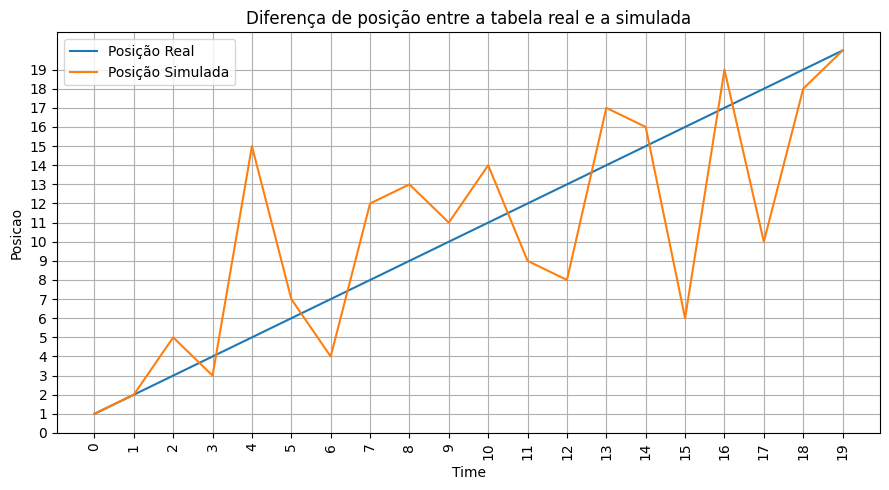

In [55]:
compare = Compare2Tables(brasil2021, create_table(simulated_results))
#print('A média de diferença de posição é: ', (compare['Posição Real'] - compare['Posição Simulada']))
#compare['Diferença'] = compare['Posição Real'] - compare['Posição Simulada']
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(compare['Posição Real'], label='Posição Real')
ax.plot(compare['Posição Simulada'], label='Posição Simulada')
ax.set_title('Diferença de posição entre a tabela real e a simulada')
ax.set_xlabel('Time')
ax.set_xticks(np.arange(0, compare.shape[0], 1))
ax.set_ylabel('Posicao')
ax.set_yticks(np.arange(0, compare.shape[0], 1))
ax.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- O modelo nao obteve uma taxa de erro muito grande, tirando alguns casos, como ter previsto que o quarto colocado seria o decimo quarto,  
ou que o decimo quinto seria o sexto, mas isso pode indicar que tais equipes tiveram azar e sorte, respectivamente.